In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df_raw = pd.read_excel(r"Mental Health Responses Cleaned.xlsx")
df_raw

,Age,Gender,Annual Income,Social Interaction - Before Pandemic,General Happiness - Before Pandemic,Mental Stress - Before Pandemic,Arguments with Family/Friends- Before Pandemic,Meeting New People/Socialising- Before Pandemic,General Productivity- Before Pandemic,Social Interaction - Post Pandemic,General Happiness - Post Pandemic,Mental Stress - Post Pandemic,Arguments with Family/Friends - Post Pandemic,Meeting New People/Socialising - Post Pandemic,General Productivity - Post Pandemic,How much time are you spending on work/studying post-pandemic as compared to pre-pandemic?
0,20,Male,Less than 5L,3,3,1,2,2,2,3,3,1,2,3,3,-1
1,19,Female,Above 20L,3,3,3,4,2,4,2,3,3,4,2,3,-1
2,20,Female,Between 15L and 20L,4,4,5,5,1,2,2,3,3,2,1,4,-2
3,20,Male,Less than 5L,5,5,5,5,5,5,5,5,5,5,5,5,-1
4,20,Male,Between 15L and 20L,4,4,4,3,4,3,2,4,4,2,3,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,54,Female,Between 5L and 10L,3,3,3,1,2,3,1,2,2,1,1,3,1
294,24,Male,Between 5L and 10L,3,4,2,1,1,3,4,4,4,2,3,2,-2
295,45,Male,Between 5L and 10L,5,5,1,1,4,5,5,5,1,1,3,4,0
296,20,Male,Less than 5L,5,4,3,3,3,3,2,4,3,4,3,4,1


In [17]:
df_raw = df_raw.drop([49,55,70], axis=0)
df_raw.reset_index()

,index,Age,Gender,Annual Income,Social Interaction - Before Pandemic,General Happiness - Before Pandemic,Mental Stress - Before Pandemic,Arguments with Family/Friends- Before Pandemic,Meeting New People/Socialising- Before Pandemic,General Productivity- Before Pandemic,Social Interaction - Post Pandemic,General Happiness - Post Pandemic,Mental Stress - Post Pandemic,Arguments with Family/Friends - Post Pandemic,Meeting New People/Socialising - Post Pandemic,General Productivity - Post Pandemic,How much time are you spending on work/studying post-pandemic as compared to pre-pandemic?
0,0,20,Male,Less than 5L,3,3,1,2,2,2,3,3,1,2,3,3,-1
1,1,19,Female,Above 20L,3,3,3,4,2,4,2,3,3,4,2,3,-1
2,2,20,Female,Between 15L and 20L,4,4,5,5,1,2,2,3,3,2,1,4,-2
3,3,20,Male,Less than 5L,5,5,5,5,5,5,5,5,5,5,5,5,-1
4,4,20,Male,Between 15L and 20L,4,4,4,3,4,3,2,4,4,2,3,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,293,54,Female,Between 5L and 10L,3,3,3,1,2,3,1,2,2,1,1,3,1
291,294,24,Male,Between 5L and 10L,3,4,2,1,1,3,4,4,4,2,3,2,-2
292,295,45,Male,Between 5L and 10L,5,5,1,1,4,5,5,5,1,1,3,4,0
293,296,20,Male,Less than 5L,5,4,3,3,3,3,2,4,3,4,3,4,1


In [18]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [19]:
df_before_pandemic = pd.DataFrame
df_before_pandemic = df_raw.iloc[:,8]
df_before_pandemic.describe()

count    295.000000
mean       3.450847
std        1.025255
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: General Productivity- Before Pandemic, dtype: float64

In [20]:
df_post_pandemic = pd.DataFrame
df_post_pandemic = df_raw.iloc[:,14]
df_post_pandemic.describe()

count    295.000000
mean       2.752542
std        1.156078
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        5.000000
Name: General Productivity - Post Pandemic, dtype: float64

In [21]:
abc = df_raw.iloc[:,15]
abc.describe()

count    295.000000
mean       0.084746
std        1.238390
min       -2.000000
25%       -1.000000
50%        0.000000
75%        1.000000
max        2.000000
Name: How much time are you spending on work/studying post-pandemic as compared to pre-pandemic?, dtype: float64

In [22]:
data_numeric_BP = df_raw.iloc[:,3:9]
data_numeric_BP

,Social Interaction - Before Pandemic,General Happiness - Before Pandemic,Mental Stress - Before Pandemic,Arguments with Family/Friends- Before Pandemic,Meeting New People/Socialising- Before Pandemic,General Productivity- Before Pandemic
0,3,3,1,2,2,2
1,3,3,3,4,2,4
2,4,4,5,5,1,2
3,5,5,5,5,5,5
4,4,4,4,3,4,3
...,...,...,...,...,...,...
293,3,3,3,1,2,3
294,3,4,2,1,1,3
295,5,5,1,1,4,5
296,5,4,3,3,3,3


In [23]:
data_numeric_AP = df_raw.iloc[:,9:15]
data_numeric_AP

,Social Interaction - Post Pandemic,General Happiness - Post Pandemic,Mental Stress - Post Pandemic,Arguments with Family/Friends - Post Pandemic,Meeting New People/Socialising - Post Pandemic,General Productivity - Post Pandemic
0,3,3,1,2,3,3
1,2,3,3,4,2,3
2,2,3,3,2,1,4
3,5,5,5,5,5,5
4,2,4,4,2,3,5
...,...,...,...,...,...,...
293,1,2,2,1,1,3
294,4,4,4,2,3,2
295,5,5,1,1,3,4
296,2,4,3,4,3,4


<AxesSubplot:title={'center':'Variables Correlation to Age- Pre Pandemic'}>

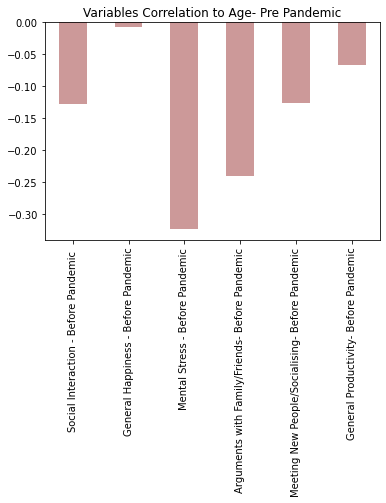

In [24]:
correlation_BP = data_numeric_BP.corrwith(df_raw.Age)
correlation_BP.plot.bar(title = 'Variables Correlation to Age- Pre Pandemic', color="#CC9999")

<AxesSubplot:title={'center':'Variables Correlation to Age - Post Pandemic'}>

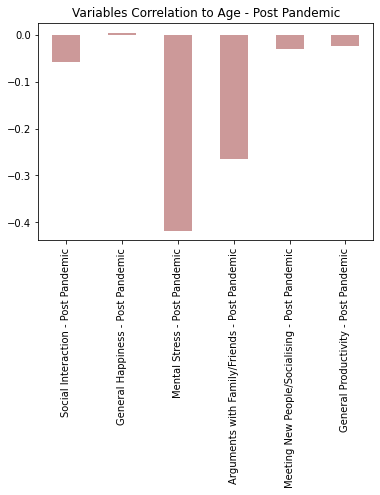

In [25]:
correlation_AP = data_numeric_AP.corrwith(df_raw.Age)
correlation_AP.plot.bar(title = 'Variables Correlation to Age - Post Pandemic', color="#CC9999")

In [26]:
from scipy.stats import ttest_rel

In [27]:
b= pd.DataFrame(data_numeric_BP.iloc[:,5])
b

,General Productivity- Before Pandemic
0,2
1,4
2,2
3,5
4,3
...,...
293,3
294,3
295,5
296,3


In [28]:
a= pd.DataFrame(data_numeric_AP.iloc[:,5])
a

,General Productivity - Post Pandemic
0,3
1,3
2,4
3,5
4,5
...,...
293,3
294,2
295,4
296,4


In [29]:
ttest_rel(b,a)

Ttest_relResult(statistic=array([9.69285373]), pvalue=array([1.85202229e-19]))